In [8]:
# load dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 6)})

In [9]:
energy_data = pd.read_csv("prod_dataset_csv.csv")
energy_data.head()

,Data_Status,StateCode,MSN,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,2017F,AK,CLPRB,11263.0,11497.0,13588.0,13307.0,11622.0,13931.0,14461.0,...,23041.0,29016.0,33556.0,33524.0,31332.000,24917.000,22944.000,17747.000,13942.000,14365.000
1,2017F,AK,CLPRK,15.6,15.6,15.6,15.6,15.6,15.6,15.6,...,15.6,15.6,15.6,15.6,15.268,15.272,15.278,15.073,14.957,14.978
2,2017F,AK,CLPRP,722.0,737.0,871.0,853.0,745.0,893.0,927.0,...,1477.0,1860.0,2151.0,2149.0,2052.000,1632.000,1502.000,1177.000,932.000,959.000
3,2017F,AK,COPRK,5.8,5.8,5.8,5.8,5.8,5.8,5.8,...,5.8,5.8,5.8,5.8,5.800,5.800,5.800,5.717,5.722,5.723
4,2017F,AK,EMFDB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
# drop column
energy_data = energy_data.drop(columns =["Data_Status"])
# rename column
energy_data = energy_data.rename(columns={'StateCode': 'State'})
energy_data.head()

,State,MSN,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AK,CLPRB,11263.0,11497.0,13588.0,13307.0,11622.0,13931.0,14461.0,14430.0,...,23041.0,29016.0,33556.0,33524.0,31332.000,24917.000,22944.000,17747.000,13942.000,14365.000
1,AK,CLPRK,15.6,15.6,15.6,15.6,15.6,15.6,15.6,15.6,...,15.6,15.6,15.6,15.6,15.268,15.272,15.278,15.073,14.957,14.978
2,AK,CLPRP,722.0,737.0,871.0,853.0,745.0,893.0,927.0,925.0,...,1477.0,1860.0,2151.0,2149.0,2052.000,1632.000,1502.000,1177.000,932.000,959.000
3,AK,COPRK,5.8,5.8,5.8,5.8,5.8,5.8,5.8,5.8,...,5.8,5.8,5.8,5.8,5.800,5.800,5.800,5.717,5.722,5.723
4,AK,EMFDB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000


In [11]:
#reset datafram index to remove uneccessary columns 
energy_data.set_index('State', inplace=True)
#KEEP ONLY THE STATE OF TEXAS 
energy_data = energy_data.drop(['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD',
                                'ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI',
                                'SC','SD','TN','UT','VA','VT','WA','WI','WV','WY','X3','X5','US'])
energy_data.head()


,MSN,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,,,,,,,,,,,,
TX,CLPRB,26409.000,26535.000,25855.000,27441.000,28839.000,30349.000,28360.000,27102.000,28839.000,...,515493.000,455507.00,538258.000,605290.000,578697.000,564850.000,576803.000,471257.000,515707.000,474274.000
TX,CLPRK,12.588,12.588,12.588,12.588,12.588,12.588,12.588,12.588,12.588,...,13.212,12.98,13.134,13.186,13.099,13.182,13.213,13.120,13.223,13.036
TX,CLPRP,2098.000,2108.000,2054.000,2180.000,2291.000,2411.000,2253.000,2153.000,2291.000,...,39017.000,35093.00,40982.000,45904.000,44178.000,42851.000,43654.000,35918.000,39001.000,36382.000
TX,COPRK,5.800,5.800,5.800,5.800,5.800,5.800,5.800,5.800,5.800,...,5.800,5.80,5.800,5.800,5.800,5.800,5.800,5.717,5.722,5.723
TX,EMFDB,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,26087.000,22999.00,35952.000,43709.000,46158.000,28450.000,43566.000,50936.000,53399.000,53128.000


In [12]:
#reset datafram index and remove uneccessary columns 
energy_data.set_index('MSN', inplace=True)
energy_data= energy_data.drop(["CLPRK","CLPRP","COPRK","EMFDB", "ENPRP","GETCB","HYTCB",
                  "NGMPK","NGMPP","NUETB","PAPRP","SOTCB","WDPRB","TETCB","WDEXB", "WDTCB", "WSTCB", "WYTCB","ROPRB"])
energy_data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
MSN,,,,,,,,,,,,,,,,,,,,,
CLPRB,26409.0,26535.0,25855.0,27441.0,28839.0,30349.0,28360.0,27102.0,28839.0,28310.0,...,515493.0,455507.0,538258.0,605290.0,578697.0,564850.0,576803.0,471257.0,515707.0,474274.0
NGMPB,6602696.0,6682140.0,6812787.0,6952455.0,7311876.0,7436127.0,7746648.0,7934585.0,8271293.0,8654795.0,...,7711507.0,7572107.0,7549424.0,8014144.0,8523892.0,8825436.0,9366356.0,9392314.0,8659988.0,8626259.0
PAPRB,5379378.0,5447308.0,5471272.0,5671135.0,5739216.0,5804308.0,6127692.0,6480449.0,6555601.0,6664147.0,...,2354440.0,2315986.0,2474970.0,3071054.0,4201648.0,5379019.0,6715919.0,7186120.0,6655905.0,7282947.0
REPRB,50155.0,52023.0,47721.0,42718.0,43884.0,48967.0,51980.0,49944.0,62939.0,64351.0,...,298470.0,295329.0,392977.0,440763.0,452930.0,476268.0,529818.0,567922.0,691225.0,786173.0
TEPRB,12058639.0,12208006.0,12357635.0,12693749.0,13123816.0,13319750.0,13954680.0,14492080.0,14918671.0,15411603.0,...,11305593.0,11072953.0,11387664.0,12546132.0,14159990.0,15645926.0,17599803.0,18029185.0,16962933.0,17573176.0


In [13]:
#traspose the dataset
energy_data = energy_data.transpose()
# state_energy.melt("StateCode")
energy_data.head()

MSN,CLPRB,NGMPB,PAPRB,REPRB,TEPRB
1960,26409.0,6602696.0,5379378.0,50155.0,12058639.0
1961,26535.0,6682140.0,5447308.0,52023.0,12208006.0
1962,25855.0,6812787.0,5471272.0,47721.0,12357635.0
1963,27441.0,6952455.0,5671135.0,42718.0,12693749.0
1964,28839.0,7311876.0,5739216.0,43884.0,13123816.0


In [16]:
energy_data.to_csv("texas_eneergy_production.csv")

In [14]:
# renaming the columns 

energy_data = energy_data.rename(columns={'CLPRB': 'Coal_prod',
                                          'NGMPB':'Gas_prod',
                                          'PAPRB':'Oil_prod',
                                          'REPRB':'Renewable_en_prod',
                                          'WDPRB':'Wood_en_prod'
                                        })
print(energy_data.head())
print(energy_data.shape) 


MSN   Coal_prod   Gas_prod   Oil_prod  Renewable_en_prod       TEPRB
1960    26409.0  6602696.0  5379378.0            50155.0  12058639.0
1961    26535.0  6682140.0  5447308.0            52023.0  12208006.0
1962    25855.0  6812787.0  5471272.0            47721.0  12357635.0
1963    27441.0  6952455.0  5671135.0            42718.0  12693749.0
1964    28839.0  7311876.0  5739216.0            43884.0  13123816.0
(58, 5)


In [283]:
# # reset the index
energy_data.reset_index(level=0, inplace=True)
energy_data.head()

MSN,index,Coal_prod,Gas_prod,Oil_prod,Renewable_en_prod,Wood_en_prod
0,1960,26409.0,6602696.0,5379378.0,50155.0,38296.0
1,1961,26535.0,6682140.0,5447308.0,52023.0,38880.0
2,1962,25855.0,6812787.0,5471272.0,47721.0,39275.0
3,1963,27441.0,6952455.0,5671135.0,42718.0,37709.0
4,1964,28839.0,7311876.0,5739216.0,43884.0,39136.0


In [284]:
energy_data = energy_data.rename(columns={'index': 'Years'})
energy_data.head()

MSN,Years,Coal_prod,Gas_prod,Oil_prod,Renewable_en_prod,Wood_en_prod
0,1960,26409.0,6602696.0,5379378.0,50155.0,38296.0
1,1961,26535.0,6682140.0,5447308.0,52023.0,38880.0
2,1962,25855.0,6812787.0,5471272.0,47721.0,39275.0
3,1963,27441.0,6952455.0,5671135.0,42718.0,37709.0
4,1964,28839.0,7311876.0,5739216.0,43884.0,39136.0


In [285]:
#convert years columns values to date format 


In [286]:
energy_data.dtypes

MSN
Years                 object
Coal_prod            float64
Gas_prod             float64
Oil_prod             float64
Renewable_en_prod    float64
Wood_en_prod         float64
dtype: object

In [287]:
energy_data['Years'] = pd.to_numeric(energy_data['Years'])
energy_data.head()

MSN,Years,Coal_prod,Gas_prod,Oil_prod,Renewable_en_prod,Wood_en_prod
0,1960,26409.0,6602696.0,5379378.0,50155.0,38296.0
1,1961,26535.0,6682140.0,5447308.0,52023.0,38880.0
2,1962,25855.0,6812787.0,5471272.0,47721.0,39275.0
3,1963,27441.0,6952455.0,5671135.0,42718.0,37709.0
4,1964,28839.0,7311876.0,5739216.0,43884.0,39136.0


In [288]:
energy_data.dtypes

MSN
Years                  int64
Coal_prod            float64
Gas_prod             float64
Oil_prod             float64
Renewable_en_prod    float64
Wood_en_prod         float64
dtype: object

In [289]:
energy_data.set_index('Years', inplace=True)
energy_data.head()

MSN,Coal_prod,Gas_prod,Oil_prod,Renewable_en_prod,Wood_en_prod
Years,,,,,
1960,26409.0,6602696.0,5379378.0,50155.0,38296.0
1961,26535.0,6682140.0,5447308.0,52023.0,38880.0
1962,25855.0,6812787.0,5471272.0,47721.0,39275.0
1963,27441.0,6952455.0,5671135.0,42718.0,37709.0
1964,28839.0,7311876.0,5739216.0,43884.0,39136.0


In [290]:
# plot = energy_data.plot()
# plot

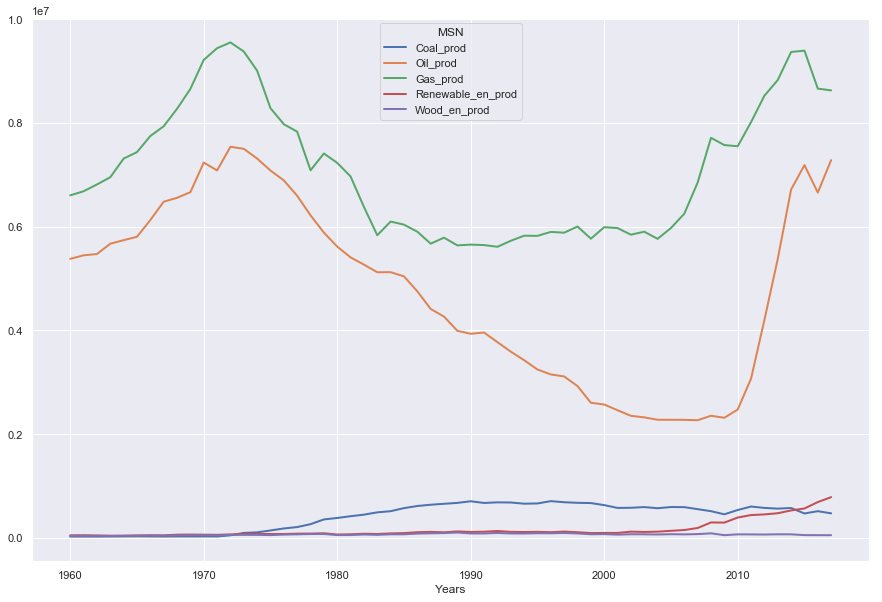

In [291]:
cols_plot = ['Coal_prod', 'Oil_prod', 'Gas_prod','Renewable_en_prod','Wood_en_prod']
axes = energy_data[cols_plot].plot(linewidth=2,figsize=(15, 10)) #, subplots=True

In [292]:
# #COAL
# COAL = energy_data.Coal_prod
# X = energy_data.index

# plt.plot(X,COAL)
# plt.show()


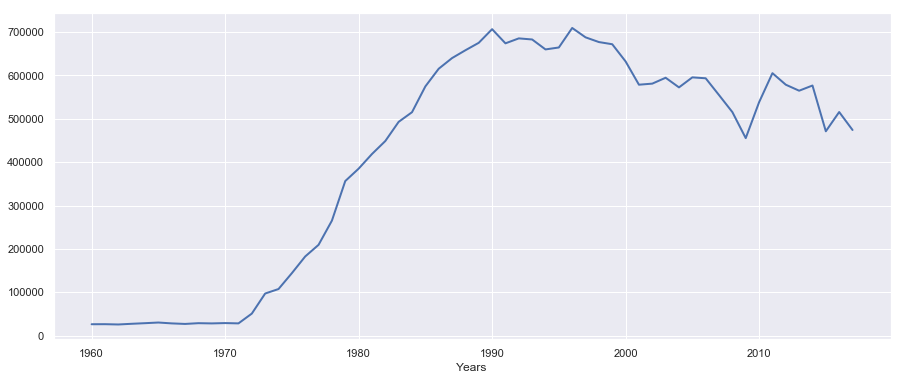

In [293]:
#Coal_prod
energy_data['Coal_prod'].plot(linewidth=2);

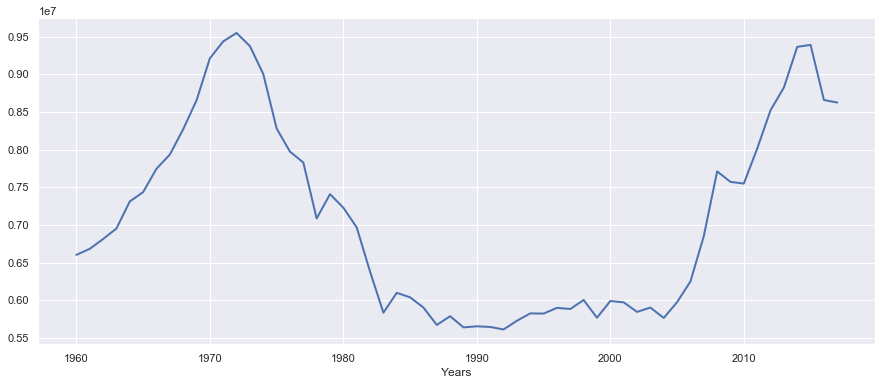

In [294]:
#Gas_prod
energy_data['Gas_prod'].plot(linewidth=2);

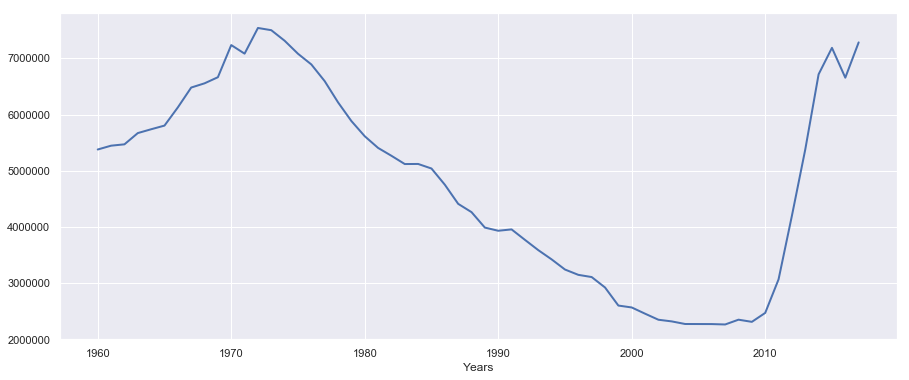

In [295]:
#Oil_prod
energy_data['Oil_prod'].plot(linewidth=2);

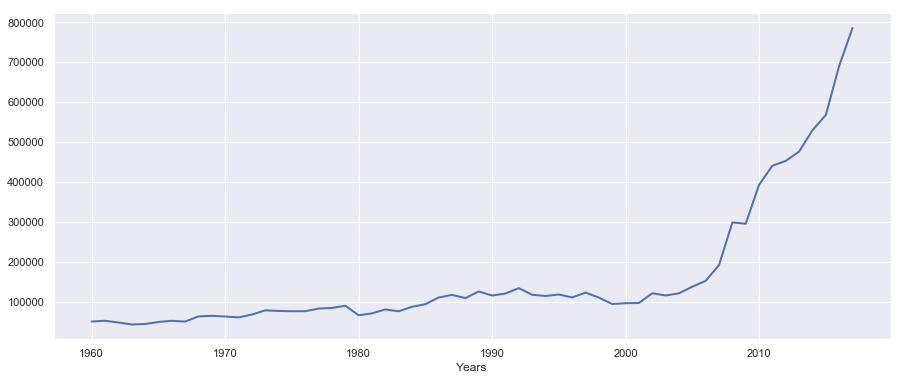

In [296]:
#Renewable enrgy production
energy_data['Renewable_en_prod'].plot(linewidth=2);

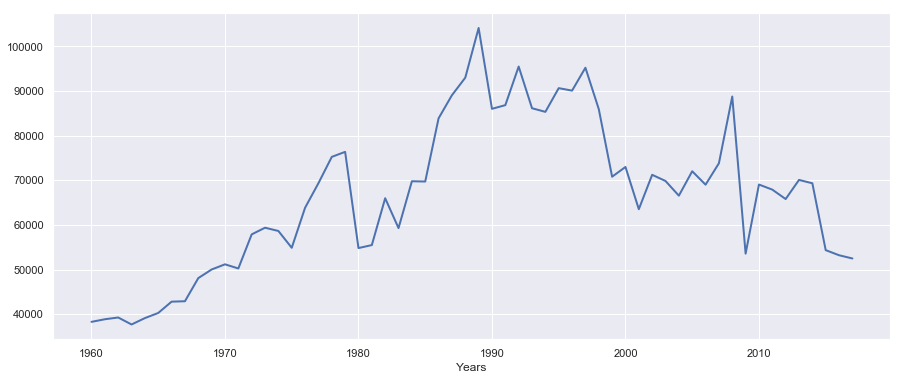

In [297]:
 #Wood_en_prod
energy_data['Wood_en_prod'].plot(linewidth=2);

In [298]:
# #Wood_en_prod
# WOOD = energy_data.Wood_en_prod
# X = energy_data.index

# plt.plot(X,WOOD)
# plt.show()

In [299]:
# # VAR example
# from statsmodels.tsa.vector_ar.var_model import VAR

# # fit model
# model = VAR(energy_data)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.forecast(model_fit.y, steps=1)
# print(yhat)

In [300]:
# #creating the train and validation set
# train = energy_data[:int(0.8*(len(energy_data)))]
# valid = energy_data[int(0.8*(len(energy_data))):]

# #fit the model
# from statsmodels.tsa.vector_ar.var_model import VAR

# model = VAR(endog=train)
# model_fit = model.fit()

# # make prediction on validation
# prediction = model_fit.forecast(model_fit.y, steps=len(valid))
# prediction

In [301]:
# #make final predictions
# model = VAR(endog=energy_data)
# model_fit = model.fit()
# yhat = model_fit.forecast(model_fit.y, steps=1)
# print(yhat)

In [302]:
energy_data.head()


MSN,Coal_prod,Gas_prod,Oil_prod,Renewable_en_prod,Wood_en_prod
Years,,,,,
1960,26409.0,6602696.0,5379378.0,50155.0,38296.0
1961,26535.0,6682140.0,5447308.0,52023.0,38880.0
1962,25855.0,6812787.0,5471272.0,47721.0,39275.0
1963,27441.0,6952455.0,5671135.0,42718.0,37709.0
1964,28839.0,7311876.0,5739216.0,43884.0,39136.0


In [303]:
columns = ['Gas_prod', 'Oil_prod','Renewable_en_prod','Wood_en_prod']
energy_data.drop(columns, inplace=True, axis=1)
energy_data.head()

MSN,Coal_prod
Years,
1960,26409.0
1961,26535.0
1962,25855.0
1963,27441.0
1964,28839.0


In [304]:
# x = energy_data.index
# y = energy_data.Coal_prod
# plt.plot(x,y)

C:\Users\hocin\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


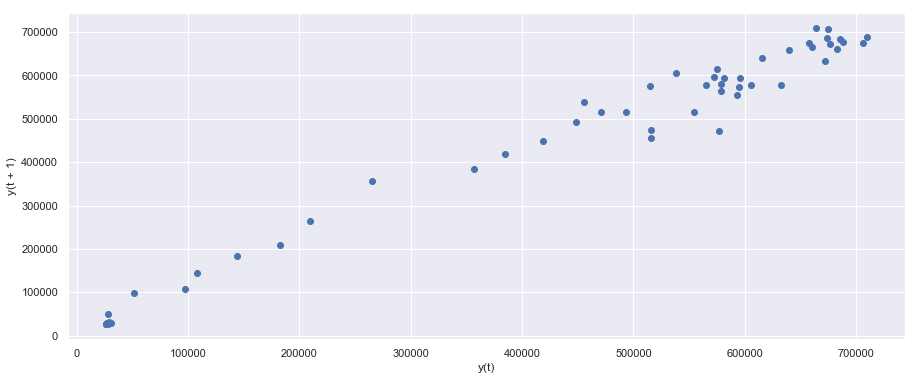

In [305]:
pd.tools.plotting.lag_plot(energy_data['Coal_prod'])

# use pandas lag_plot() function to see how well the values of the original sales data are correlated with each other. 
# If they are highly correlated, we’ll see a fairly close grouping of datapoints that align along some point/line on the plot.

C:\Users\hocin\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


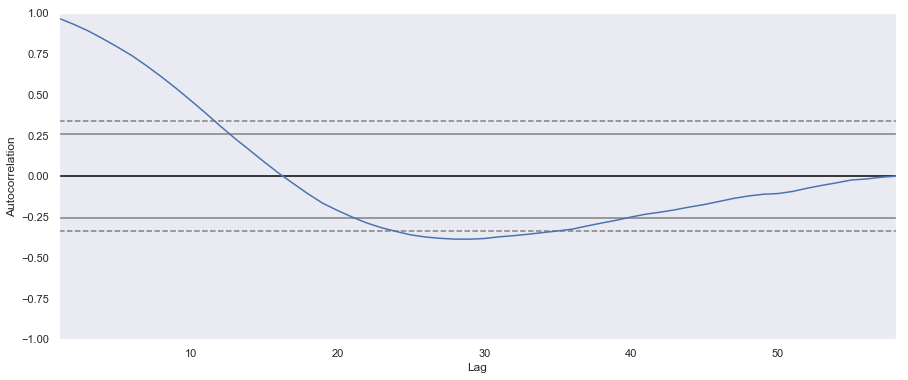

In [306]:
pd.tools.plotting.autocorrelation_plot(energy_data['Coal_prod'])

# The resulting chart contains a few lines on it separate from the autocorrelation function. 
# The dark horizontal line at zero just denotes the zero line, the lighter full horizontal lines is the 95% confidence level 
# and the dashed horizontal lines are 99% confidence levels,
# which means that correlations are more significant if they occur at those levels.

In [307]:
energy_data['stationary']= energy_data['Coal_prod'].diff()
energy_data.head()


MSN,Coal_prod,stationary
Years,,
1960,26409.0,NaN
1961,26535.0,126.0
1962,25855.0,-680.0
1963,27441.0,1586.0
1964,28839.0,1398.0


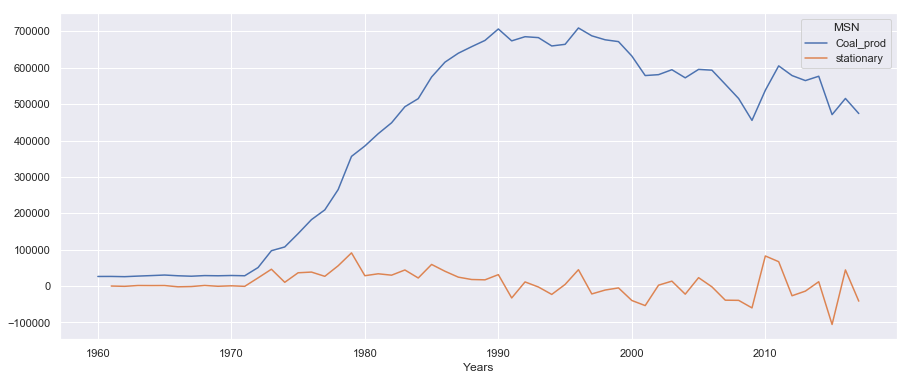

In [308]:
energy_data.plot()
plt.show()

In [327]:
#Forecasting/ predicting by using the autoregression 

from statsmodels.tsa.ar_model import AR

#create train/test datasets
X = energy_data['stationary'].dropna() 

train_data = X[1:len(X)-5]
test_data = X[X[len(X)-5:]]

# msk = np.random.rand(len(X)) < 0.8

# train_data = X[msk]
# test_data = X[~msk]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()
train_data
test_data
X

C:\Users\hocin\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Years
1961       126.0
1962      -680.0
1963      1586.0
1964      1398.0
1965      1510.0
1966     -1989.0
1967     -1258.0
1968      1737.0
1969      -529.0
1970       768.0
1971      -718.0
1972     22558.0
1973     46298.0
1974     10360.0
1975     36584.0
1976     38491.0
1977     26809.0
1978     55808.0
1979     91256.0
1980     28517.0
1981     33797.0
1982     29963.0
1983     44247.0
1984     22221.0
1985     59465.0
1986     40756.0
1987     24561.0
1988     18051.0
1989     17178.0
1990     31440.0
1991    -32653.0
1992     11424.0
1993     -2524.0
1994    -22923.0
1995      4467.0
1996     44998.0
1997    -21595.0
1998    -10898.0
1999     -5027.0
2000    -39629.0
2001    -53664.0
2002      2472.0
2003     13566.0
2004    -22245.0
2005     23123.0
2006     -2116.0
2007    -38776.0
2008    -39227.0
2009    -59986.0
2010     82751.0
2011     67032.0
2012    -26593.0
2013    -13847.0
2014     11953.0
2015   -105546.0
2016     44450.0
2017    -41433.0
Name: stationary, dtype: 

# In the above, we are simply creating a testing and training dataset and then creating and fitting our AR() model. 
# Once you’ve fit the model, you can look at the chosen lag and parameters of the model using some simple print statements.

In [319]:
print('The lag value chose is: %s' % model_fitted.k_ar)
 
# The lag value chose is: 10
 
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 10
The coefficients of the model are:
 const             6535.272195
L1.stationary        0.068352
L2.stationary        0.304505
L3.stationary        0.353936
L4.stationary       -0.178618
L5.stationary       -0.243067
L6.stationary        0.227316
L7.stationary        0.655674
L8.stationary        0.108624
L9.stationary       -0.427475
L10.stationary      -0.309753
dtype: float64


C:\Users\hocin\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


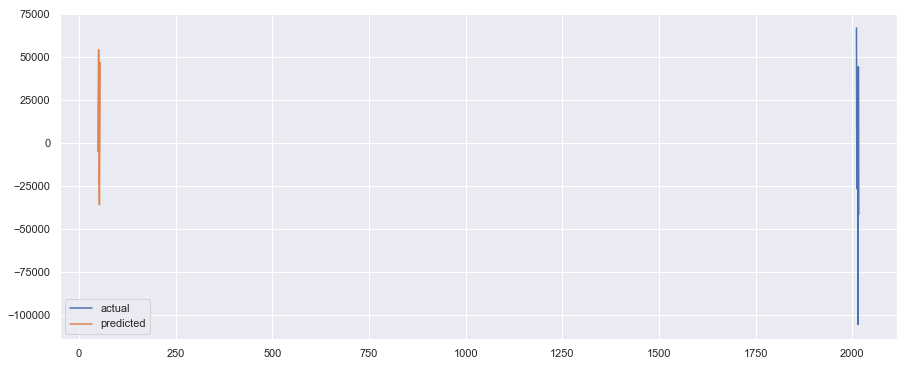

In [323]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# create a comparison dataframe
compare_df = pd.concat(
    [energy_data['stationary'].tail(7), 
    predictions], axis=1).rename(
    columns={'stationary': 'actual', 0:'predicted'}) 

#plot the two values
compare_df.plot()

In [322]:

from sklearn.metrics import r2_score

r2 = r2_score(energy_data["stationary"].tail(7), predictions) 
r2


-0.4395493664847776